# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

<font color='blue'>El dataset proporcionado se denomina *Home Equity Dataset (HMEQ)*. En Inglés, *home equity* hace referencia a un préstamo hipotecario del cual se descuenta cualquier otra hipoteca que puede tener la propiedad. Por ejemplo, si la propiedad vale 100kUSD, y la misma tiene una hipoteca con un saldo de 60kUSD, entonces se puede pedir un *equity loan* hasta por un valor de 40kUSD. La traducción formal al español se encuentra como *préstamos sobre el valor líquido de la vivienda*. En particular, el dataset incorpora una serie de atributos para 1189 muestras con información sobre préstamos que no funcionaron como se esperaba (~20% de un total de 5960 casos). Se espera este dataset ayude a entidades financieras a decidir si se debería aprobar o no la adjudicación de un nuevo préstamo.</font>

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

<font color='blue'>La variable objetivo en el dataset figura bajo el nombre *TARGET*. La misma es una variable binaria que toma el valor *1* indentificando el caso en el tomador del préstamo ha caído en *default* (no ha pagado el crédito) o *0* para el caso en el cual el crédito derivó en un caso delictivo pero que de todas maneras fue correctamente reembolsado por el cliente. Se reportan un total de 1189 casos problemáticos.</font>

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

<font color='blue'>El dataset incluye un total de 10 atributos + 1 variable objetivo (11 en total):
  1. TARGET: Variable objetivo (*1* = default, *0* = reembolso).
  2. LOAN: Monto total del préstamos solicitado.
  3. MORTDUE: Monto que debe de la hipoteca actual.
  4. VALUE: Valor de la propiedad (LOAN + MORTDUE <= VALUE).
  5. YOJ: Cantidad de años en el trabajo actual.
  6. DEROG: Cantidad de informes derogatorios enviados.
  7. DELINQ: Cantidad de líneas de crédito en falta.
  8. CLAGE: Edad en meses de la línea de crédito más antigua.
  9. NINQ: Cantidad de líneas de créditos recientes.
  10. CLNO: Cantidad de líneas de créditos.
  11. DEBTINC: Ratio deuda-ingreso.</font>

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

<font color='blue'>Luego de explorar el dataset, sospechamos que los siguientes atributos son los más determinantes para detectar un caso de *default*:
  1. DELINQ: Creemos que una cantidad de líneas de crédito en estado rebeldía indican una alta probabilidad de que el cliente entre en default.
  2. DEROG: Creemos que la cantidad de intimaciones recibida por el aplicante es un índice directo de la posibilidad de que no pague el crédito. 
  3. DEBTINC: Creemos que mientras mayor sea la relación deuda-salario del aplicante, mayor son las chances de que el mismo no pueda enfrentar las obligaciones.</font>

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#### Train Model

In [3]:
# Input: Train and Test (10 attributes)
X_train.shape, X_test.shape

((1483, 10), (371, 10))

In [4]:
# Output: Train and Test (1 objective)
y_train.shape, y_test.shape

((1483,), (371,))

In [5]:
# Import the SGDClassifier
from sklearn.linear_model import SGDClassifier

In [6]:
# Create SGD classifier with default parameters
# loss="hinge", penalty="l2", alpha=0.0001...
# We only set the random_state to an int to ensure reproducible output
clf = SGDClassifier(random_state=5)

In [7]:
# Train the model
clf.fit(X_train, y_train)

SGDClassifier(random_state=5)

In [8]:
# Run a sample prediction
clf.predict(X_train.loc[[0]])

array([1])

In [9]:
# Print the model coefficients (to ensure repetibility)
clf.coef_

array([[  9975.52089918,  -3395.35471711,   9601.66871617,
         -1649.98333582,    740.00436716,   1098.91625389,
        -45138.0284077 ,    855.96405135,   1208.66996886,
         11378.80746566]])

#### Evaluate Model (Accuracy)

In [10]:
# Import accuracy score (classification score)
from sklearn.metrics import accuracy_score

In [11]:
# Predict X_train
y_train_pred = clf.predict(X_train)
# Predict X_test
y_test_pred = clf.predict(X_test)

In [12]:
# Inspect ground truth and predicted values
y_train.to_numpy(), y_train_pred

(array([0, 0, 0, ..., 1, 0, 0]), array([1, 1, 1, ..., 1, 1, 1]))

In [13]:
# Inspect array sizes
len(y_train.to_numpy()), len(y_train_pred)

(1483, 1483)

In [14]:
# Determine model accuracy (training set)
accuracy_score(y_train, y_train_pred)

0.174645987862441

In [15]:
# Determine model accuracy (test set)
accuracy_score(y_test, y_test_pred)

0.15902964959568733

#### Evaluate Model (Precission)

In [16]:
# Import precission score (tp / (tp + fp))
from sklearn.metrics import precision_score

In [17]:
# Determine model precision (training set) 
precision_score(y_train, y_train_pred)

0.17016949152542374

In [18]:
# Determine model precision (test set) 
precision_score(y_test, y_test_pred)

0.15675675675675677

#### Evaluate Model (Recall)

In [19]:
# Import recall score (tp / (tp + fn))
from sklearn.metrics import recall_score

In [20]:
# Determine model recall (training set) 
recall_score(y_train, y_train_pred)

1.0

In [21]:
# Determine model recall (test set) 
recall_score(y_test, y_test_pred)

1.0

#### Evaluate Model (F1)

In [22]:
# Import F1 score (harmonic mean between precision and recall)
from sklearn.metrics import f1_score

In [23]:
# Determine model F1 (training set) 
f1_score(y_train, y_train_pred)

0.290845886442642

In [24]:
# Determine model F1 (test set) 
f1_score(y_test, y_test_pred)

0.2710280373831776

#### Evaluate Model (Conf. Matrix)

In [25]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix
!wget https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/utils.py
from utils import plot_confusion_matrix

--2022-07-21 01:00:53--  https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   1.96K  --.-KB/s    in 0s      

2022-07-21 01:00:54 (28.8 MB/s) - ‘utils.py’ saved [2010/2010]



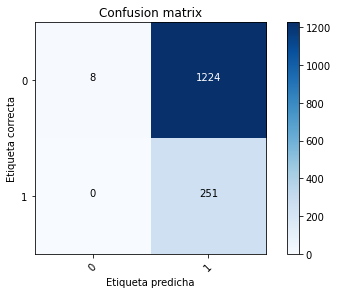

In [26]:
# Determine model confusion matrix (training set) 
plot_confusion_matrix(confusion_matrix(y_train, y_train_pred), ["0", "1"])

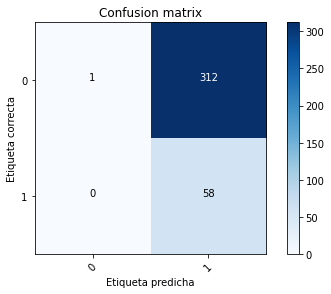

In [27]:
# Determine model confusion matrix (test set) 
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), ["0", "1"])

#### Conclusion and Remarks
<font color='blue'>Esta primer búsqueda resultó en un modelo muy pobre, con accuracy de apenas un 0.17.</font>

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Exhaustive Grid Search

In [28]:
# Investigate SGDClassifier parameters
# SGDClassifier??

In [29]:
# Loss functions:
# loss = str -> d='hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'

# Regularization term multiplier:
# alpha = float -> d=0.0001 

# Learning rate:
# learning_rate = str -> d='optimal', 'constant', 'invscaling',
# eta0 = float -> d=0.0 (not used for optimal)

In [30]:
# Prepare parameter grid with loss, alpha, learning rate and eta values
# (optimal learning rate was left out as it needs a fixed eta0 = 0.0)
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': [0.001, 0.0001, 0.00001],
    'learning_rate': ['constant', 'invscaling'],
    'eta0': [0.1, 1.0],
}

In [31]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [32]:
# Create exhaustive grid search and KFold iterator
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=kf)

In [33]:
# Fit the grid search model(s)
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SGDClassifier(random_state=5),
             param_grid={'alpha': [0.001, 0.0001, 1e-05], 'eta0': [0.1, 1.0],
                         'learning_rate': ['constant', 'invscaling'],
                         'loss': ['hinge', 'log', 'modified_huber']},
             scoring='accuracy')

In [34]:
# Obtain the resutls and plot ranked table
# Mean and Std. Deviation of the Accuracy is reported for each
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'param_learning_rate', 'param_eta0', 
    'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
# df

,param_loss,param_alpha,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
17,modified_huber,0.0001,invscaling,0.1,0.829420,0.016391,1
34,log,0.00001,invscaling,1.0,0.829420,0.016391,1
16,log,0.0001,invscaling,0.1,0.829420,0.016391,1
35,modified_huber,0.00001,invscaling,1.0,0.829420,0.016391,1
28,log,0.00001,invscaling,0.1,0.829416,0.013040,5
29,modified_huber,0.00001,invscaling,0.1,0.829416,0.013040,5
21,hinge,0.0001,invscaling,1.0,0.826727,0.019862,7
3,hinge,0.001,invscaling,0.1,0.826727,0.019862,7
24,hinge,0.00001,constant,0.1,0.826049,0.016792,9
19,log,0.0001,constant,1.0,0.818641,0.028592,10


In [35]:
cv_best = cv.best_estimator_

In [36]:
cv.best_params_

{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'log'}

#### Conclusion and Remarks
<font color='blue'>La evaluación exhaustiva de la grilla nos permitió encontrar un set de parámetros de entrenamiento que nos entrega una precisión de 0.83, comparada con la 0.17 encontrada en el primer intento.</font>

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)#max_depth=2, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

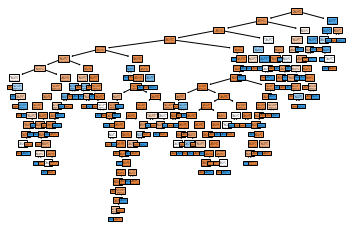

In [38]:
from sklearn.tree import plot_tree

plot_tree(clf,filled=True);

In [39]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_prec = precision_score(y_train, y_train_pred)
test_prec = precision_score(y_test, y_test_pred)
train_rec = recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')
print(f'Train precision: {train_prec:0.2}')
print(f'Test precision: {test_prec:0.2}')
print(f'Train recall: {train_rec:0.2}')
print(f'Test recall: {test_rec:0.2}')
print(f'Train f1: {train_f1:0.2}')
print(f'Test f1: {test_f1:0.2}')

Train accuracy: 1.0
Test accuracy: 0.89
Train precision: 1.0
Test precision: 0.65
Train recall: 1.0
Test recall: 0.62
Train f1: 1.0
Test f1: 0.64


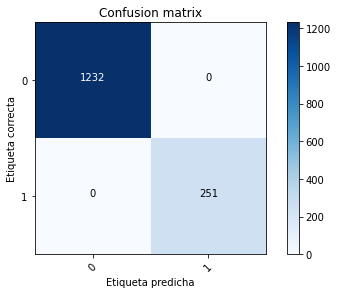

In [41]:
plot_confusion_matrix(confusion_matrix(y_train, y_train_pred), ["0","1"])

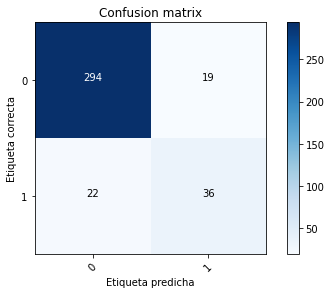

In [42]:
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), ["0","1"])

In [43]:
#def probs(y):
#    _, counts = np.unique(y, return_counts=True)
#    probs = counts / counts.sum()
#    return probs

#def entropy(y):
#    p = probs(y)
#    return - np.sum(p * np.log2(p))

#entropy(y_train)

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

####Exhaustive Grid Search

In [44]:
# Prepare parameter grid with loss, alpha, learning rate and eta values
# (optimal learning rate was left out as it needs a fixed eta0 = 0.0)
param_grid = {
  "criterion": ["gini", "entropy"], #"log_loss"],
  "max_depth": [2,5, 10, 15,None],
  "min_samples_leaf": [1,5,10],
}

In [45]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [47]:
# Create exhaustive grid search
cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=kf)

In [48]:
# Fit the grid search model(s)
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, None],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='accuracy')

In [49]:
# Obtain the resutls and plot ranked table
# Mean and Std. Deviation of the Accuracy is reported for each
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
# df

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
6,gini,10,1,0.886719,0.019459,1
20,entropy,5,10,0.883340,0.007336,2
21,entropy,10,1,0.882646,0.016060,3
5,gini,5,10,0.882005,0.010577,4
3,gini,5,1,0.878631,0.004597,5
18,entropy,5,1,0.878624,0.003023,6
19,entropy,5,5,0.876611,0.010018,7
8,gini,10,10,0.876608,0.008041,8
11,gini,15,10,0.875933,0.010677,9
9,gini,15,1,0.874586,0.017817,10


In [50]:
cv_best = cv.best_estimator_

In [51]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [52]:
cv_best.fit(X_train, y_train)
y_train_pred = cv_best.predict(X_train)
y_test_pred = cv_best.predict(X_test)

####Analisis de la mejor configuracion

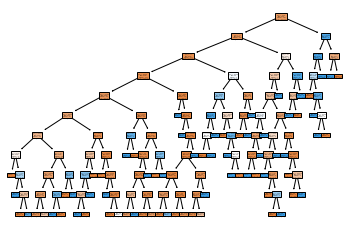

In [53]:
plot_tree(cv_best,filled=True);

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_prec = precision_score(y_train, y_train_pred)
test_prec = precision_score(y_test, y_test_pred)
train_rec = recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')
print(f'Train precision: {train_prec:0.2}')
print(f'Test precision: {test_prec:0.2}')
print(f'Train recall: {train_rec:0.2}')
print(f'Test recall: {test_rec:0.2}')
print(f'Train f1: {train_f1:0.2}')
print(f'Test f1: {test_f1:0.2}')



Train accuracy: 0.96
Test accuracy: 0.91
Train precision: 0.99
Test precision: 0.8
Train recall: 0.75
Test recall: 0.57
Train f1: 0.85
Test f1: 0.67


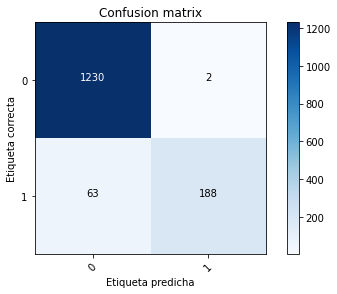

In [55]:
plot_confusion_matrix(confusion_matrix(y_train, y_train_pred), ["0","1"])

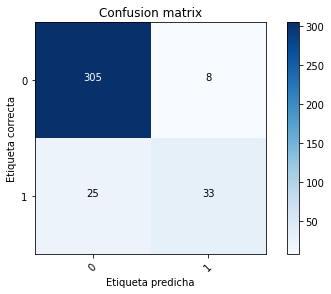

In [56]:
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), ["0","1"])